In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def print_results(df, sample_type):
    mu = df[df['Sample Type'] == sample_type]['ACC-true'].mean()
    sigma = df[df['Sample Type'] == sample_type]['ACC-true'].std()
    best = df[df['Sample Type'] == sample_type]['ACC-true'].max()
    print(f'ACC: {mu:.3f} +- {sigma:.3f}, Best: {best:.3f}')
    # print(f'${mu:.3f}\pm{sigma:.3f}$')

    mu = df[df['Sample Type'] == sample_type]['AUC-true'].mean()
    sigma = df[df['Sample Type'] == sample_type]['AUC-true'].std()
    best = df[df['Sample Type'] == sample_type]['AUC-true'].max()
    print(f'AUC: {mu:.3f} +- {sigma:.3f}, Best: {best:.3f}')
    # print(f'${mu:.3f}\pm{sigma:.3f}$')

# Load file

In [3]:
file_name = './DNN/CWoLa_Hunting_training_results.csv'
df = pd.read_csv(file_name)

# Basic CWoLa hunting

### 1000 GeV

In [4]:
print('With signal sample')
print_results(df, 'With signal')

print('No signal sample')
print_results(df, 'No signal')

With signal sample
ACC: 0.868 +- 0.024, Best: 0.896
AUC: 0.925 +- 0.023, Best: 0.951
No signal sample
ACC: 0.850 +- 0.033, Best: 0.897
AUC: 0.909 +- 0.026, Best: 0.949


### 500 GeV

In [5]:
print('With signal sample')
print_results(df, '500 GeV: With signal')

print('No signal sample')
print_results(df, '500 GeV: No signal')

With signal sample
ACC: 0.708 +- 0.002, Best: 0.711
AUC: 0.770 +- 0.007, Best: 0.786
No signal sample
ACC: 0.705 +- 0.003, Best: 0.709
AUC: 0.769 +- 0.009, Best: 0.783


# Remove transverse momentum and mass of Higgs candidates

## 500 GeV

In [6]:
print('With signal sample')
print_results(df, '500 GeV: With signal, no Higgs pT, m')
print('No signal sample')
print_results(df, '500 GeV: No signal, no Higgs pT, m')
print('10 times signal sample')
print_results(df, '500 GeV: 10 times signal, no Higgs pT, m')
print('100 times signal sample')
print_results(df, '500 GeV: 100 times signal, no Higgs pT, m')

With signal sample
ACC: 0.526 +- 0.020, Best: 0.558
AUC: 0.536 +- 0.053, Best: 0.597
No signal sample
ACC: 0.532 +- 0.015, Best: 0.555
AUC: 0.543 +- 0.029, Best: 0.572
10 times signal sample
ACC: 0.531 +- 0.027, Best: 0.565
AUC: 0.533 +- 0.045, Best: 0.593
100 times signal sample
ACC: 0.634 +- 0.014, Best: 0.649
AUC: 0.751 +- 0.030, Best: 0.772


## 1000 GeV

In [7]:

print('With signal sample')
print_results(df, '1000 GeV: With signal, no Higgs pT, m')
print('No signal sample')
print_results(df, '1000 GeV: No signal, no Higgs pT, m')
print('10 times signal sample')
print_results(df, '1000 GeV: 10 times signal, no Higgs pT, m')
print('100 times signal sample')
print_results(df, '1000 GeV: 100 times signal, no Higgs pT, m')

With signal sample
ACC: 0.586 +- 0.030, Best: 0.638
AUC: 0.625 +- 0.046, Best: 0.700
No signal sample
ACC: 0.564 +- 0.024, Best: 0.620
AUC: 0.583 +- 0.042, Best: 0.682
10 times signal sample
ACC: 0.626 +- 0.027, Best: 0.677
AUC: 0.678 +- 0.040, Best: 0.738
100 times signal sample
ACC: 0.621 +- 0.012, Best: 0.640
AUC: 0.670 +- 0.023, Best: 0.699


# Various signal sample size

In [8]:
ACC, std = [], []
times = [*range(10, 101, 10), 120, 150]
for i in times:
    sample_type = f'500 GeV: {i} times signal, no Higgs pT, m'
    ACC.append(df[df['Sample Type'] == sample_type]['ACC-true'].mean())
    std.append(df[df['Sample Type'] == sample_type]['ACC-true'].std())

no_sig_acc = df[df['Sample Type'] == '500 GeV: No signal, no Higgs pT, m']['ACC-true'].mean()
no_sig_std = df[df['Sample Type'] == '500 GeV: No signal, no Higgs pT, m']['ACC-true'].std()

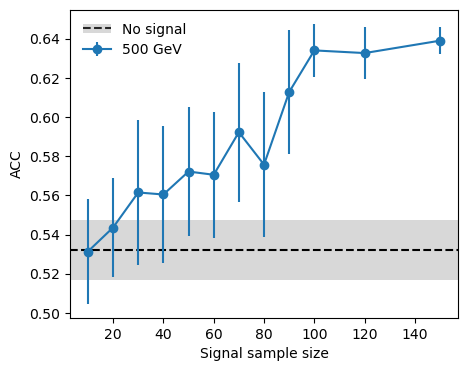

In [9]:
fig, ax = plt.subplots(1,1,figsize=(5, 4))
# plot no signal sample ACC with error bar
ax.axhline(y=no_sig_acc, color='k', linestyle='--', label='No signal sample')
ax.axhspan(no_sig_acc - no_sig_std, no_sig_acc + no_sig_std, facecolor='gray', alpha=0.3, label='Shaded Band')

ax.errorbar(times, ACC, yerr=std, marker='o', label='500 GeV')
ax.set_xlabel('Signal sample size')
ax.set_ylabel('ACC')

handles, labels = ax.get_legend_handles_labels()
handles = [(handles[0],handles[1]), handles[2] ]
labels = ['No signal', labels[2]]
ax.legend(handles, labels, frameon=False, loc='upper left')

plt.savefig('./figures/ACC_vs_signal_sample_size-500GeV.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

In [10]:
ACC, std = [], []
sample_type = f'1000 GeV: With signal, no Higgs pT, m'
ACC.append(df[df['Sample Type'] == sample_type]['ACC-true'].mean())
std.append(df[df['Sample Type'] == sample_type]['ACC-true'].std())

for i in range(2, 11, 1):
    sample_type = f'1000 GeV: {i} times signal, no Higgs pT, m'
    ACC.append(df[df['Sample Type'] == sample_type]['ACC-true'].mean())
    std.append(df[df['Sample Type'] == sample_type]['ACC-true'].std())

no_sig_acc = df[df['Sample Type'] == '1000 GeV: No signal, no Higgs pT, m']['ACC-true'].mean()
no_sig_std = df[df['Sample Type'] == '1000 GeV: No signal, no Higgs pT, m']['ACC-true'].std()

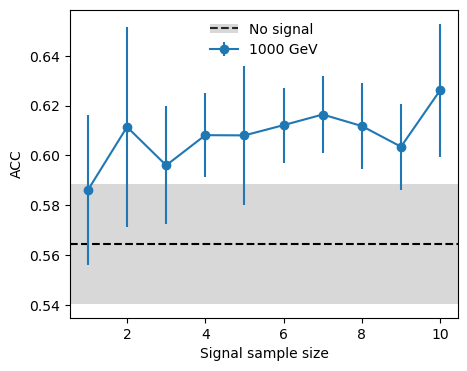

In [11]:
fig, ax = plt.subplots(1,1,figsize=(5, 4))
# plot no signal sample ACC with error bar
ax.axhline(y=no_sig_acc, color='k', linestyle='--', label='No signal sample')
ax.axhspan(no_sig_acc - no_sig_std, no_sig_acc + no_sig_std, facecolor='gray', alpha=0.3, label='Shaded Band')

ax.errorbar(range(1, 11, 1), ACC, yerr=std, marker='o', label='1000 GeV')
ax.set_xlabel('Signal sample size')
ax.set_ylabel('ACC')

handles, labels = ax.get_legend_handles_labels()
handles = [(handles[0],handles[1]), handles[2] ]
labels = ['No signal', labels[2]]
ax.legend(handles, labels, frameon=False, loc='upper center')

plt.savefig('./figures/ACC_vs_signal_sample_size-1000GeV.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()